<a href="https://colab.research.google.com/github/EnzoNevesDEV/P_BigData/blob/main/T_BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABALHO BIGDATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Análise e Manipulação de Dados**

In [ ]:
# Importação das bibliotecas.

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
# Importar a Base de Dados (Pasta Vendas)

tabela_vendas = pd.read_excel("/content/drive/MyDrive/Trabalho BIGDATA/Vendas/Vendas_BR_Mercado_Livre_202405.xlsx")

# Filtrar os dados da tabela tabela_vendas onde o Status é "Entregue" (processo de venda concluído)
tabela_entregue = tabela_vendas[tabela_vendas['Status'] == 'Entregue']

In [ ]:
# Calcular o produto mais vendido (em Quantidade)

tb_qtd_produto = tabela_entregue.groupby('Título do anúncio').sum(int)
tb_qtd_produto = tb_qtd_produto[['Unidades']]


tb_qtd_produto = tb_qtd_produto.sort_values(by= 'Unidades', ascending=False)

# Formatação numérica
from babel.numbers import format_currency

tb_qtd_produto_formatado = pd.DataFrame(tb_qtd_produto['Unidades'].apply(lambda v:"{:,}".format(v).replace(',','.')))
tb_qtd_produto_formatado = tb_qtd_produto_formatado.reset_index()

display(tb_qtd_produto_formatado)


,Título do anúncio,Unidades
0,Kimono Jiu Jitsu Trançado,977.0
1,Kimono De Jiu-jitusu Trançado + Faixa Oficial ...,686.0
2,Kimono Jiu Jitsu Trançado Leve Azul + Faixa Of...,334.0
3,Kimono Jiujitsu Trançado Akira Bronze + Faixa...,165.0
4,Kimono Jiu Jitsu Tradicional Akira + Faixa,71.0
5,Kimono De Jiu-jitusu Trançado Akira + Faixa Of...,52.0
6,Kimono Jiujitsu Trançado Akira Bronze,46.0
7,Kimono Jiu Jitsu Trançado Akira + Faixa Oficia...,19.0
8,Kimono Jiu Jitsu Tradicional Akira,15.0
9,Kimono De Jiu Jitsu Trançado Akira,10.0


In [ ]:
# Calcular o produto mais vendido (em Faturamento)

tabela_entregue['Faturamento'] = tabela_entregue['Unidades'] * tabela_entregue['Total (BRL)']
tb_faturamento = tabela_entregue.groupby('Título do anúncio').sum(int)
tb_faturamento = tb_faturamento[['Faturamento']]
tb_faturamento = tb_faturamento.sort_values(by='Faturamento', ascending=True)

# Formatação monetária

tb_faturamento_formatado = pd.DataFrame(tb_faturamento['Faturamento'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR')))
tb_faturamento_formatado = tb_faturamento_formatado.reset_index()

display(tb_faturamento_formatado)

<ipython-input-6-d35f5cae2b89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_entregue['Faturamento'] = tabela_entregue['Unidades'] * tabela_entregue['Total (BRL)']


,Título do anúncio,Faturamento
0,Kimono Jiu-jitsu Akira Infantil,"R$ 320,14"
1,Kimono De Jiu-jitsu Akira Tradicional,"R$ 854,51"
2,Kimono Jiu-jitsu Infantil Trançado,"R$ 1.383,85"
3,Kimono Jiu-jitsu Trançado + Faixa Oficial Akira,"R$ 1.512,54"
4,Kimono De Jiu Jitsu Trançado Akira,"R$ 1.901,10"
5,Kimono Jiu Jitsu Tradicional Akira,"R$ 3.703,55"
6,Kimono Jiu Jitsu Trançado Akira + Faixa Oficia...,"R$ 4.075,78"
7,Kimono Jiujitsu Trançado Akira Bronze,"R$ 10.788,32"
8,Kimono De Jiu-jitusu Trançado Akira + Faixa Of...,"R$ 12.780,39"
9,Kimono Jiu Jitsu Tradicional Akira + Faixa,"R$ 23.260,11"


In [ ]:
# Criar uma cópia da tabela original para manter os dados intactos
tabela_separada = tabela_entregue.copy()

# Extrair o ano e o mês da coluna "Mês de faturamento das suas tarifas"
tabela_separada['Mês'] = tabela_separada['Mês de faturamento das suas tarifas'].str.split(' ', expand=True)[0]
tabela_separada['Ano'] = tabela_separada['Mês de faturamento das suas tarifas'].str.split(' ', expand=True)[1].astype(str)

tabela_separada['Ano'] = pd.to_numeric(tabela_separada['Ano'], errors='coerce')

# Remover as linhas com valores NaN
tabela_separada = tabela_separada.dropna(subset=['Ano'])

# Converter a coluna para inteiros
tabela_separada['Ano'] = tabela_separada['Ano'].astype(int)

# Mapear os nomes dos meses para o formato numérico
meses_dict = {'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4, 'maio': 5, 'junho': 6,
              'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12}
tabela_separada['Mês'] = tabela_separada['Mês'].map(meses_dict)

# Criar uma nova coluna de data combinando o ano e o mês, adicionando o dia padrão como 01
tabela_separada['Data'] = pd.to_datetime(tabela_separada['Ano'].astype(str) + tabela_separada['Mês'].astype(str).str.zfill(2) + '01', format='%Y%m%d')
# Extrair o ano e o mês
tabela_separada['Ano/Mês'] = tabela_separada['Data'].dt.strftime('%Y.%m')


<ipython-input-7-b519398c4312>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_separada['Ano'] = tabela_separada['Ano'].astype(int)
<ipython-input-7-b519398c4312>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_separada['Mês'] = tabela_separada['Mês'].map(meses_dict)
<ipython-input-7-b519398c4312>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
tb_faturamento_mensal = tabela_separada.groupby('Ano/Mês').sum(int)
tb_faturamento_mensal = tb_faturamento_mensal[['Total (BRL)']]

# Formatação monetária

tb_faturamento_m_formatado = pd.DataFrame(tb_faturamento_mensal['Total (BRL)'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR')))
tb_faturamento_m_formatado = tb_faturamento_m_formatado.reset_index()

# Excluir a linha com o índice especificado
tb_faturamento_m_formatado = tb_faturamento_m_formatado.drop(11)

display(tb_faturamento_m_formatado)

,Ano/Mês,Total (BRL)
0,2023.07,"R$ 688,08"
1,2023.08,"R$ 25.003,57"
2,2023.09,"R$ 32.902,41"
3,2023.10,"R$ 37.534,97"
4,2023.11,"R$ 54.678,26"
5,2023.12,"R$ 47.351,39"
6,2024.01,"R$ 47.561,85"
7,2024.02,"R$ 53.417,25"
8,2024.03,"R$ 58.520,36"
9,2024.04,"R$ 71.928,81"


In [ ]:
# Calcular a Cidade que possui mais vendas (em Quantidade)

tb_cidade_vendas = tabela_entregue.groupby('Cidade').sum(int)
tb_cidade_vendas = tb_cidade_vendas[['Unidades']]

tb_cidade_vendas = tb_cidade_vendas.sort_values(by= 'Unidades', ascending=False)

tb_cidade_vendas_formatado = pd.DataFrame(tb_cidade_vendas['Unidades'].apply(lambda v:"{:,}".format(v).replace(',','.')))
tb_cidade_vendas_formatado = tb_cidade_vendas_formatado.reset_index()

# Excluir a linha com o índice especificado
tb_cidade_vendas_formatado = tb_cidade_vendas_formatado.drop(1)

# Excluir registro vazio da Coluna 'Cidade'
tb_cidade_vendas = tb_cidade_vendas[tb_cidade_vendas['Unidades'] != 72]

display(tb_cidade_vendas_formatado)

,Cidade,Unidades
0,Rio de Janeiro,153.0
2,São Paulo,70.0
3,Brasília,35.0
4,Manaus,34.0
5,Duque de Caxias,22.0
...,...,...
903,Jacundá,1.0
904,Jacuí,1.0
905,Jaguaribe,1.0
906,Jandaia do Sul,1.0


# **Criação de Gráficos**

<ipython-input-10-aa0225ebbaf2>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ano/Mês,Total (BRL)
0,2023.07,688
1,2023.08,25003
2,2023.09,32902
3,2023.10,37534
4,2023.11,54678
5,2023.12,47351
6,2024.01,47561
7,2024.02,53417
8,2024.03,58520
9,2024.04,71928


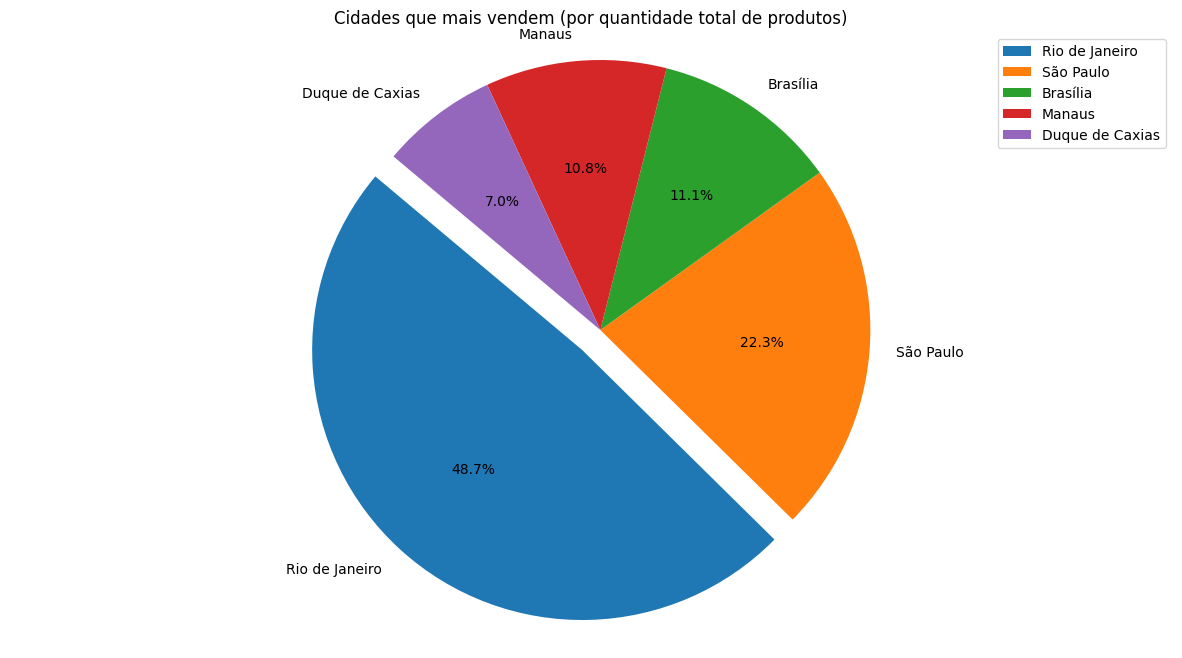

In [ ]:

# Vou assumir que 'tabela_entregue' é o seu DataFrame

# Agrupar por título do anúncio e somar as quantidades
tb_qtd_produto = tabela_entregue.groupby('Título do anúncio')['Unidades'].sum().reset_index()

# Ordenar os produtos por quantidade em ordem decrescente
tb_qtd_produto = tb_qtd_produto.sort_values(by='Unidades', ascending=True)

# Limitar o número de produtos exibidos
max_produtos = 10
top_produtos = tb_qtd_produto.head(max_produtos)

# Criar gráfico de barras
grafico = px.bar(tb_qtd_produto, x='Unidades', y='Título do anúncio', orientation='h',
                 title='Produtos Mais Vendidos (em Quantidade)',
                 labels={'Unidades': 'Quantidade Vendida', 'Título do anúncio': 'Produto'})

# Ajustar a aparência
grafico.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                      marker_line_width=1.5, opacity=0.6)

grafico.update_layout(showlegend=False, xaxis_title=None, yaxis_title=None)

# Calcular o faturamento por produto
tabela_entregue['Faturamento'] = tabela_entregue['Unidades'] * tabela_entregue['Total (BRL)']

# Agrupar por título do anúncio e somar o faturamento
tb_faturamento = tabela_entregue.groupby('Título do anúncio')['Faturamento'].sum().reset_index()

# Ordenar os produtos por faturamento em ordem decrescente
tb_faturamento = tb_faturamento.sort_values(by='Faturamento', ascending=True)

# Limitar o número de produtos exibidos
max_produtos = 10
top_produtos = tb_faturamento.head(max_produtos)

# Criar gráfico de barras
grafico2 = px.bar(tb_faturamento, x='Faturamento', y='Título do anúncio', orientation='h',
                 title='Produtos Mais Vendidos (em Faturamento)',
                 labels={'Faturamento': 'Faturamento (BRL)', 'Título do anúncio': 'Produto'})

# Ajustar a aparência
grafico2.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                      marker_line_width=1.5, opacity=0.6)

grafico2.update_layout(showlegend=False, xaxis_title=None, yaxis_title=None)

# Converter a coluna para inteiros
tb_faturamento_mensal['Total (BRL)'] = tb_faturamento_mensal['Total (BRL)'].astype(int)


# Excluir a linha com o índice especificado
tb_faturamento_mensal = tb_faturamento_mensal.reset_index()
tb_faturamento_mensal = tb_faturamento_mensal.drop(11)

# Criar o gráfico
grafico_area = px.area(tb_faturamento_mensal, y='Total (BRL)', x='Ano/Mês')

# Adicionar título e rótulos dos eixos
grafico_area.update_layout(
    title="Faturamento Mensal",
    xaxis_title="Data",
    yaxis_title="Faturamento "
)

# Ajustar o tamanho do gráfico
grafico_area.update_layout(
    autosize=False,
    width=800,
    height=500,
)

# Personalizar as cores
grafico_area.update_traces(
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    line=dict(
        color='rgb(8,48,107)',
        width=1.5,
    ),
    hovertemplate='<b>Data</b>: %{x}<br><b>Total</b>: %{y}'
)

# Adicionar grade
grafico_area.update_layout(
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(0,0,0,0.1)',
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(0,0,0,0.1)',
        tickprefix='R$'
    ),
)

# Alterar a opacidade da área
grafico_area.update_traces(fill='tonexty', fillcolor='rgba(158,202,225,0.5)')

# Exibir o gráfico
# Exibir o gráfico
display(tb_faturamento_mensal)
grafico.show()
grafico2.show()
grafico_area.show()

# Selecionar os 5 primeiros registros de maior quantidade por produto
top_5_cidades = tb_cidade_vendas.nlargest(5, 'Unidades')

# Criar um gráfico de pizza
plt.figure(figsize=(15, 8))
explode = (0.1, 0, 0, 0, 0)  # Destacar a primeira fatia
plt.pie(top_5_cidades['Unidades'], labels=top_5_cidades.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Assegura que o gráfico de pizza é desenhado como um círculo

# Adicionar uma legenda
plt.legend(loc="best")

plt.title('Cidades que mais vendem (por quantidade total de produtos)')

plt.show()